In [1]:
import json

# json_file = "./threshold_range.json"
# NOTE OLD format json files
json_file="../../model-outputs/mnist_b_lenet_se_0-0.95-4bit.json"

with open(json_file) as json_data:
    data = json.load(json_data)

#data

In [2]:
threshold_axis = []

exit_percs = []
accu_percs = []
comp_labels = []
for comp in data[0]['comps']:
  exit_percs.append([])
  accu_percs.append([])
  comp_labels.append(comp['name'])

for test in data:
  threshold_axis.append(test['comps'][0]['exit_threshs'][0])
  
  for i, comp in enumerate(test['comps']):
    exit_percs[i].append(comp['exit_percs'][0])
    accu_percs[i].append(comp['accu_percs'][0])

#threshold_axis, comp_labels, exit_percs

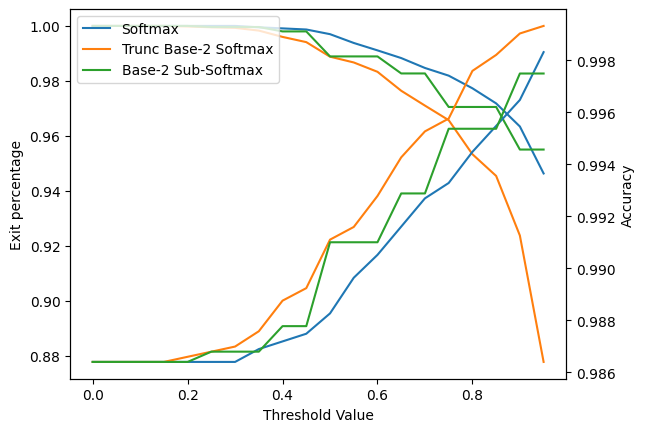

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for label, y1, y2 in zip(comp_labels, exit_percs, accu_percs):
  ax1.plot(threshold_axis, y1, label=label)
  ax2.plot(threshold_axis, y2, label=label)
# plt.title('title name')
ax1.set_xlabel('Threshold Value')
ax1.set_ylabel('Exit percentage')
ax2.set_ylabel('Accuracy')
plt.legend()
plt.show()